In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
test = pd.read_csv("test.csv")
test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
 15  Clearsky DHI        0 non-null      float64
 16  Clea

In [ ]:
sub = pd.read_csv("sample_submission.csv")
sub.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
train = pd.read_csv("train.csv")
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

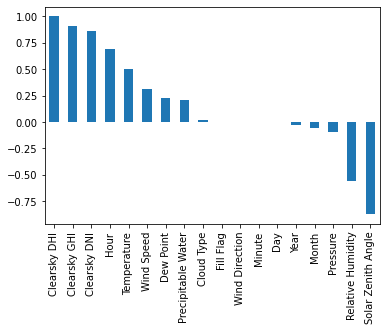

In [ ]:
train.corr()['Clearsky DHI'].sort_values(ascending=False).plot(kind='bar')

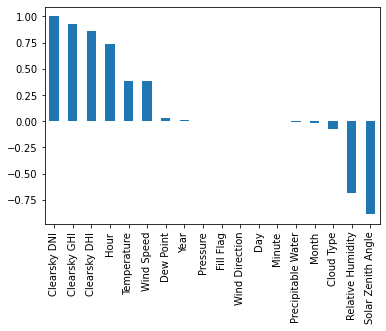

In [ ]:
train.corr()['Clearsky DNI'].sort_values(ascending=False).plot(kind='bar')

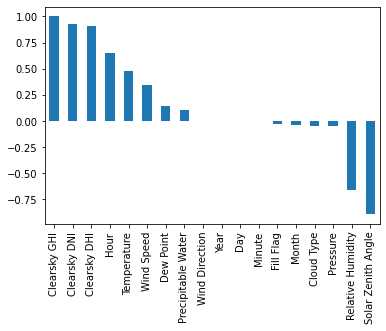

In [ ]:
train.corr()['Clearsky GHI'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
train['Clearsky DHI'].nunique()

375

In [ ]:
train['Clearsky DNI'].nunique()

1032

In [ ]:
train['Clearsky GHI'].nunique()

1053

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [ ]:
train.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag'],
      dtype='object')

In [ ]:
trainc = train.copy()

In [ ]:
trainc.drop(['Year','Month','Day','Minute','Wind Direction','Fill Flag'],axis=1,inplace=True)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
trainc.head()

,Hour,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Speed
0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,1,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,1,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,2,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,3.0


In [ ]:
cols = list(trainc.columns.values)
cols

['Hour',
 'Clearsky DHI',
 'Clearsky DNI',
 'Clearsky GHI',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Speed']

In [ ]:
trainc = trainc[['Hour','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Speed','Clearsky DHI','Clearsky DNI','Clearsky GHI']]

In [ ]:
trainc.head()

,Hour,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1,0,0,0
1,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1,0,0,0
2,1,4,0.0,5.0,1010,78.27,118.50,0.482,3.2,0,0,0
3,1,4,0.0,4.0,1010,78.27,124.78,0.478,3.1,0,0,0
4,2,4,0.0,4.0,1010,76.45,131.12,0.475,3.0,0,0,0


In [ ]:
X = trainc.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1)
y = trainc[['Clearsky DHI','Clearsky DNI','Clearsky GHI']]

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
mo = MultiOutputRegressor(gbr)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
mo.fit(X,y)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [ ]:
score = mo.score(X,y)
print("Training score:", score)

Training score: 0.973592309958641


In [ ]:
test1 = test.copy()


In [ ]:
test1.fillna(0.0)

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,0.0,0.0,0.0
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,0.0,0.0,0.0
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,0.0,0.0,0.0
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,0.0,0.0,0.0
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2019,12,31,21,30,0,5.6,11.1,1006,68.64,77.89,0.8,276,2.2,0,0.0,0.0,0.0
17516,2019,12,31,22,0,0,5.7,9.3,1006,78.31,83.06,0.8,274,1.7,0,0.0,0.0,0.0
17517,2019,12,31,22,30,0,5.7,8.5,1006,82.64,88.34,0.8,273,1.8,0,0.0,0.0,0.0
17518,2019,12,31,23,0,0,4.8,7.8,1006,81.49,94.37,0.8,272,1.8,0,0.0,0.0,0.0


In [ ]:
test1.drop(['Year','Month','Day','Minute','Wind Direction','Fill Flag'],axis=1,inplace=True)

In [ ]:
colss = list(test1.columns.values)
colss

['Hour',
 'Cloud Type',
 'Dew Point',
 'Temperature',
 'Pressure',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Precipitable Water',
 'Wind Speed',
 'Clearsky DHI',
 'Clearsky DNI',
 'Clearsky GHI']

In [ ]:
trainc.columns

Index(['Hour', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water',
       'Wind Speed', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],
      dtype='object')

In [ ]:
test1.columns

Index(['Hour', 'Cloud Type', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Solar Zenith Angle', 'Precipitable Water',
       'Wind Speed', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'],
      dtype='object')

In [ ]:
test1.isna().sum()

Hour                      0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Speed                0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [ ]:
test1['Clearsky DHI'].value_counts()

0.0    17520
Name: Clearsky DHI, dtype: int64

In [ ]:
test1.fillna(0.0,axis=1,inplace=True)

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hour                17520 non-null  int64  
 1   Cloud Type          17520 non-null  int64  
 2   Dew Point           17520 non-null  float64
 3   Temperature         17520 non-null  float64
 4   Pressure            17520 non-null  int64  
 5   Relative Humidity   17520 non-null  float64
 6   Solar Zenith Angle  17520 non-null  float64
 7   Precipitable Water  17520 non-null  float64
 8   Wind Speed          17520 non-null  float64
 9   Clearsky DHI        17520 non-null  float64
 10  Clearsky DNI        17520 non-null  float64
 11  Clearsky GHI        17520 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.6 MB


In [ ]:
test1.drop(['Clearsky DHI','Clearsky DNI','Clearsky GHI'],axis=1,inplace=True)

In [ ]:
ypred = mo.predict(test1)

In [ ]:
res = pd.DataFrame(ypred,columns=['Clearsky DHI','Clearsky DNI','Clearsky GHI'])

In [ ]:
res.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,-0.415016,0.773366,0.143434
1,-0.496792,1.053853,0.212945
2,-0.496792,1.333797,0.212945
3,-0.496792,2.296546,0.212945
4,0.195549,0.742487,0.214253


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Clearsky DHI  17520 non-null  float64
 1   Clearsky DNI  17520 non-null  float64
 2   Clearsky GHI  17520 non-null  float64
dtypes: float64(3)
memory usage: 410.8 KB


In [67]:
x=res.round(0).astype(int)

In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Clearsky DHI  17520 non-null  int64
 1   Clearsky DNI  17520 non-null  int64
 2   Clearsky GHI  17520 non-null  int64
dtypes: int64(3)
memory usage: 410.8 KB


In [69]:
x.head()

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,1,0
1,0,1,0
2,0,1,0
3,0,2,0
4,0,1,0


In [71]:
x.to_csv('my_submission_file.csv', index=False)

0      88248
88       854
90       814
84       813
86       802
       ...  
347        1
547        1
375        1
551        1
345        1
Name: Clearsky DHI, Length: 375, dtype: int64